In [1]:
from glob import glob
import pandas as pd

In [2]:
# Opción que deshabilita el limite de columnas y filas mostradas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

---
## Carga de data Yelp

In [3]:
# Path de los archivos no-procesados (formato parquet)
path_data = '../data/raw'

### `y-business.parquet`

In [41]:
df_business = pd.read_parquet(f'{path_data}/y-business.parquet')

### `y-checkin.parquet`

In [5]:
df_checkin = pd.read_parquet(f'{path_data}/y-checkin.parquet')

### `y-tip.parquet`

In [52]:
df_tip = pd.read_parquet(f'{path_data}/y-tip.parquet')

### `y-review.parquet`

In [7]:
# Crear lista de archivos en /data/raw/y-review/
review_parquets = glob(f'{path_data}/y-review/*')
review_parquets

['../data/raw/y-review/y-review_03.parquet',
 '../data/raw/y-review/y-review_02.parquet',
 '../data/raw/y-review/y-review_01.parquet']

In [8]:
# Crear dataframe donde se unen los datos extraidos de parquet
df_review = pd.DataFrame()
# Iterar por cada parquet dentro de /data/raw/y-review/
for p in review_parquets:
    # Leer parquet
    df = pd.read_parquet(p)
    # Unir a df_review
    df_review = pd.concat([df_review, df], ignore_index=True)

### `y-user.parquet`

In [9]:
# Crear lista de archivos en /data/raw/y-user/
user_parquets = glob(f'{path_data}/y-user/*')
user_parquets

['../data/raw/y-user/y-user_04.parquet',
 '../data/raw/y-user/y-user_02.parquet',
 '../data/raw/y-user/y-user_03.parquet',
 '../data/raw/y-user/y-user_01.parquet']

In [10]:
# Crear dataframe donde se unen los datos extraidos de parquet
df_user = pd.DataFrame()
# Iterar por cada parquet dentro de /data/raw/y-user/
for p in user_parquets:
    # Leer parquet
    df = pd.read_parquet(p)
    # Unir a df_user
    df_user = pd.concat([df_user, df], ignore_index=True)

---
## Análisis Exploratorio

In [34]:
# Revisar el dataset e imprimir las primeras filas
print(df_business.info())
df_business.head()

<class 'pandas.core.frame.DataFrame'>
Index: 52268 entries, 3 to 150340
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   52268 non-null  object 
 1   name          52268 non-null  object 
 2   city          52268 non-null  object 
 3   state         52268 non-null  object 
 4   latitude      52268 non-null  float64
 5   longitude     52268 non-null  float64
 6   stars         52268 non-null  float64
 7   review_count  52268 non-null  int64  
 8   attributes    51703 non-null  object 
 9   categories    52268 non-null  object 
 10  hours         44990 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 4.8+ MB
None


,business_id,name,city,state,latitude,longitude,stars,review_count,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,CA,39.955505,-75.155564,4.0,80,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', '..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,Ashland City,AZ,36.269593,-87.058943,2.0,6,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Friday': '9:0-0:0', 'Monday': '0:0-0:0', 'Sa..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,Affton,TN,38.565165,-90.321087,3.0,19,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,Nashville,MO,36.208102,-86.768170,1.5,10,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Friday': '6:0-16:0', 'Monday': '0:0-0:0', 'S..."
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,Tampa Bay,MO,27.955269,-82.456320,4.0,10,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Vietnamese, Food, Restaurants, Food Trucks","{'Friday': '11:0-14:0', 'Monday': '11:0-14:0',..."


In [42]:
# Completar los nulos con espacio para poder filtrar por categoría
df_business['categories'] = df_business['categories'].fillna('')

In [43]:
# Dejar en el dataset solo la categoría 'Restaurants'
filtro_categoria = 'Restaurants'
df_business = df_business[df_business['categories'].str.contains(filtro_categoria, case=False)]
df_business.shape

(52268, 14)

In [44]:
# Filtramos los datos a la región elegida
estados_filtro = ["DE", "NJ", "PA"]
df_business = df_business[df_business['state'].isin(estados_filtro)]
df_business.shape

(15414, 14)

In [45]:
# Revisar los datos nuevamente
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15414 entries, 22 to 150340
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   15414 non-null  object 
 1   name          15414 non-null  object 
 2   address       15414 non-null  object 
 3   city          15414 non-null  object 
 4   state         15414 non-null  object 
 5   postal_code   15414 non-null  object 
 6   latitude      15414 non-null  float64
 7   longitude     15414 non-null  float64
 8   stars         15414 non-null  float64
 9   review_count  15414 non-null  int64  
 10  is_open       15414 non-null  int64  
 11  attributes    15239 non-null  object 
 12  categories    15414 non-null  object 
 13  hours         13215 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.8+ MB


Solo tenemos algunos nulos en "attributes" y "hours", que por el momento no se van a rellenar, hasta decidir si estas columnas serán utilizadas para los análisis.

In [46]:
# Revisar las columnas numéricas
df_business.describe()

,latitude,longitude,stars,review_count,is_open
count,15414.000000,15414.000000,15414.000000,15414.000000,15414.000000
mean,36.996730,-87.809662,3.508726,89.138575,0.661931
std,6.001368,13.757462,0.832169,197.681018,0.473068
min,27.674685,-120.000083,1.000000,5.000000,0.000000
25%,32.219742,-90.225726,3.000000,13.000000,0.000000
50%,39.474340,-86.044822,3.500000,33.000000,1.000000
75%,39.956275,-75.335114,4.000000,89.000000,1.000000
max,53.679197,-74.684399,5.000000,6093.000000,1.000000


No se observan valores erróneos, como latitud y longitud con signo invertido, o calificaciones fuera del intérvalo 1 a 5.

Por el momento se va a mantener como está, hasta decidir si alguna de las "keys" puede ser de utilidad para algún análisis, y en ese caso se prodecerá a desanidar los datos.

In [47]:
# Revisar nombres de columnas
df_business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

#### Las siguientes columnas serán eliminadas:

addres: Se cuenta con los datos de latitud y longitud  
is_open: Se entiende que se refiere al momento de la extracción de los datos. Se cuenta con los horarios de apertura y cierre


In [48]:
# Eliminar las columnas antes mencionadas
df_business.drop("address", axis=1, inplace=True)
df_business.drop("is_open", axis=1, inplace=True)

In [49]:
df_business.to_parquet(f'{path_data}/etl-business.parquet')

In [50]:
# Revisar el contenido de la columna "attributes"
df_business["attributes"].iloc[0]

{'AcceptsInsurance': None,
 'AgesAllowed': None,
 'Alcohol': None,
 'Ambience': None,
 'BYOB': None,
 'BYOBCorkage': None,
 'BestNights': None,
 'BikeParking': None,
 'BusinessAcceptsBitcoin': None,
 'BusinessAcceptsCreditCards': None,
 'BusinessParking': None,
 'ByAppointmentOnly': None,
 'Caters': None,
 'CoatCheck': None,
 'Corkage': None,
 'DietaryRestrictions': None,
 'DogsAllowed': None,
 'DriveThru': None,
 'GoodForDancing': None,
 'GoodForKids': None,
 'GoodForMeal': None,
 'HairSpecializesIn': None,
 'HappyHour': None,
 'HasTV': None,
 'Music': None,
 'NoiseLevel': None,
 'Open24Hours': None,
 'OutdoorSeating': None,
 'RestaurantsAttire': None,
 'RestaurantsCounterService': None,
 'RestaurantsDelivery': 'True',
 'RestaurantsGoodForGroups': None,
 'RestaurantsPriceRange2': '2',
 'RestaurantsReservations': None,
 'RestaurantsTableService': None,
 'RestaurantsTakeOut': 'True',
 'Smoking': None,
 'WheelchairAccessible': None,
 'WiFi': None}

-------------------

In [20]:
# Revisar el dataset
print(df_checkin.info())
df_checkin.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB
None


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


#### En principio no vamos a realizar análisis que incluyan la fecha y hora de ingreso de los usuarios al local. Este dataset no se va a utilizar, por lo que no se va a desanidar la columna de registros (date), ni se va a realizar ningún otro proceso sobre el mismo. Se observa de todos modos que el dataset no contiene valores nulos.

-------------------

In [53]:
# Revisar el dataset
print(df_tip.info())
df_tip.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908915 non-null  object        
 1   business_id       908915 non-null  object        
 2   text              908915 non-null  object        
 3   date              908915 non-null  datetime64[ns]
 4   compliment_count  908915 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.7+ MB
None


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [54]:
df_tip.describe()

,date,compliment_count
count,908915,908915.000000
mean,2015-06-14 10:13:53.302817280,0.012525
min,2009-04-16 13:11:49,0.000000
25%,2013-01-26 01:18:02.500000,0.000000
50%,2015-03-15 01:10:25,0.000000
75%,2017-08-02 06:19:55.500000,0.000000
max,2022-01-19 20:38:55,6.000000
std,NaN,0.120763


Los datos no contienen nulos y están en el formato correcto.

In [55]:
# Sacar los id de los locales elegidos en el dataset de Business
locales_elegidos = df_business["business_id"]

In [56]:
# Filtrar los tips
df_tip = df_tip[df_tip["business_id"].isin(locales_elegidos)]
df_tip.shape


(195976, 5)

In [58]:
df_tip.to_parquet(f'{path_data}/etl-tip.parquet')

---

In [26]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             string 
 1   name                string 
 2   review_count        int64  
 3   yelping_since       string 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               string 
 8   friends             string 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), string(5)
memory usage: 353.4 MB


## Mapa

In [27]:
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [28]:
df_business.columns

Index(['business_id', 'name', 'city', 'state', 'latitude', 'longitude',
       'stars', 'review_count', 'attributes', 'categories', 'hours'],
      dtype='object')

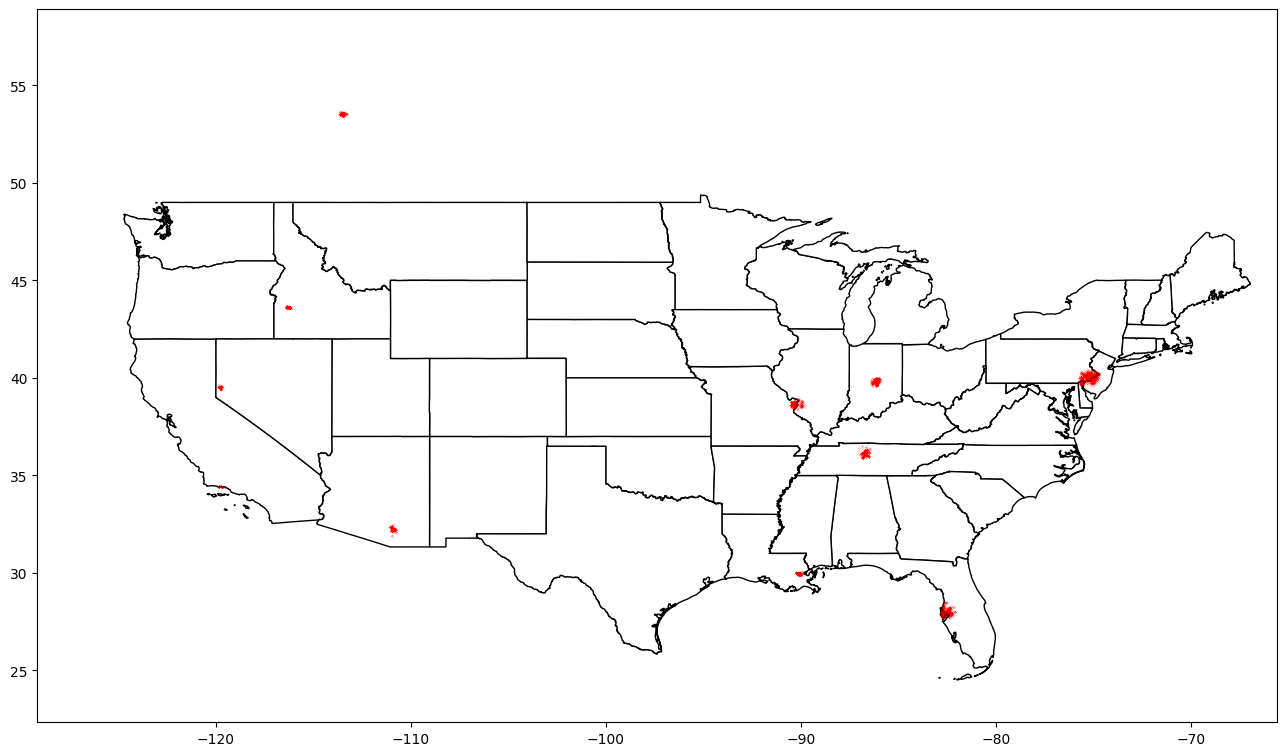

In [33]:
# Mapeamos las coordinadas de 'pos_x' y 'pos_y'
# Descartamos los nulos
df = df_business.dropna(axis=0, subset=['longitude', 'latitude'])

# Crear un GeoDataFrame con la data de coordinadas
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)

# Cargar archivo shapefile
mapa = gpd.read_file('../assets/map_state_5m.shp')

# Calculamos los limites del mapa
minx, miny, maxx, maxy = gdf.total_bounds

# Creamos los plots del mapa
fig, ax = plt.subplots(figsize=(16, 14))
mapa.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, marker='o', color='red', markersize=.0001)

# Calculamos el margen del grafico
margin_ratio = 0.2
marginx = (maxx - minx) * margin_ratio
marginy = (maxy - miny) * margin_ratio
# Aplicamos los margenes en relacion a los plots en los extremos
ax.set_xlim(minx - marginx, maxx + marginx)
ax.set_ylim(miny - marginy, maxy + marginy)

plt.show()